# Notebook 7: **Regression-Based Rating Prediction Using Embedding Features**

Welcome to the seventh notebook of our project for AlgorithmArcade Inc. In this notebook, we will develop regression models to predict user ratings using embedding features extracted from users and courses. By leveraging these embeddings as input features, we can train regression algorithms to predict ratings, providing an alternative approach to the neural network model.

## **Table of Contents**

1. **Introduction**
2. **Import Libraries**
3. **Load Data**
4. **Preprocessing**
   * Load Embeddings
   * Prepare the Training and Test Sets
5. **Build Regression Models**
   * Linear Regression
   * Ridge Regression
   * Lasso Regression
   * ElasticNet Regression
   * Random Forest Regressor
   * Gradient Boosting Regressor
6. **Hyperparameter Tuning**
   * Cross-Validation Setup
   * Hyperparameter Grids 
6. **Train and Evaluate the Model**
   * Model Evaluation Metrics
   * Comparison of Models
7. **Results and Insights**
8. **Conclusion**
9. **Thanks and Contact Information**

## 1. **Introduction**

In this notebook, we’ll:

   * Extract embedding features for users and courses from the neural network model built previously.
   * Train Regression models (*Linear Regression, Ridge, Lasso, ElasticNet, Random Forest, Gradient Boosting*) using these embeddings.
   * Compare the performance of different regression algorithms in predicting user ratings.

## 2. **Import Libraries**

First, let’s import the necessary Python libraries.

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For displaying visuals in higher resolution
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set consistent color palette
sns.set_palette('Blues_d')

## 3. **Load Data**

We will load the datasets from the data folder.

In [2]:
# Load embeddings
user_embeddings = pd.read_csv('../Data/user_embeddings.csv')
course_embeddings = pd.read_csv('../Data/course_embeddings.csv')

# Load user rating data
user_ratings = pd.read_csv('../Data/user_rating_info.csv')

## 4. **Preprocessing**

We need to prepare the data for extracting embeddings and training regression models.

### 4.1 Load Embeddings

Merge user embeddings with ratings.

In [3]:
# Merge user embeddings
user_embeddings.rename(columns={'user': 'user_id'}, inplace=True)
user_data = pd.merge(user_ratings, user_embeddings, on='user_id', how='left')

Merge course embeddings.

In [4]:
# Merge course embeddings
course_embeddings.rename(columns={'course': 'course_id'}, inplace=True)
full_data = pd.merge(user_data, course_embeddings, on='course_id', how='left')

### 4.2 Prepare the Training and Test Sets

Separate features and target variable.

In [5]:
# Extract feature columns
embedding_cols = [col for col in full_data.columns if col.startswith('0')]

# Features and target
X = full_data[embedding_cols]
y = full_data['rating']

Split the data.

In [6]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 5892
Test samples: 1474


Scale the features.

In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. **Building Regression Models**

We will build three regression models:
   * **Linear Regression**
   * **Random Forest Regressor**
   * **Gradient Boosting Regressor**

### 5.1 Linear Regression

In [8]:
# Initialize the model
lr_model = LinearRegression()

### 5.2 Ridge Regression

In [9]:
# Initialize the model
ridge_model = Ridge()

### 5.3 Lasso Regression

In [10]:
# Initialize the model
lasso_model = Lasso()

### 5.4 ElasticNet Regression

In [11]:
# Initialize the model
elastic_model = ElasticNet()

### 5.5 Random Forest Regressor

In [12]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

### 5.6 Gradient Boosting Regressor

In [13]:
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

## 6. **Hyperparameter Tuning**

We will perform hyperparameter tuning using GridSearchCV for each model.

### 6.1 Cross-Validation Setup

In [14]:
# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

### 6.2 Hyperparameter Grids

In [15]:
# Hyperparameter grid for Ridge Regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Hyperparameter grid for Lasso Regression
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

# Hyperparameter grid for ElasticNet
elastic_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Hyperparameter grid for Random Forest Regressor
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt']
}

# Hyperparameter grid for Gradient Boosting Regressor
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

## 7. **Training and Evaluating the Models**

### 7.1 Model Evaluation Metrics

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

In [17]:
def grid_search_evaluate(model, params, X_train, y_train, X_test, y_test, model_name):
    grid_search = GridSearchCV(model, params, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    mse, rmse, mae, r2 = evaluate_model(best_model, X_test, y_test)
    print(f"{model_name} Best Params: {grid_search.best_params_}")
    print(f"\n{model_name} RMSE: {rmse:.4f}, MAE: {mae:.4f}, R Squared: {r2:.4f}")
    return best_model, rmse, mae, r2

Train and evaluate Linear Regression.

In [18]:
lr_model.fit(X_train_scaled, y_train)
lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate_model(lr_model, X_test_scaled, y_test)
print(f"Linear Regression RMSE: {lr_rmse:.4f}, MAE: {lr_mae:.4f}, R Squared: {lr_r2:.4f}")

Linear Regression RMSE: 1.0057, MAE: 0.7899, R Squared: 0.0097


Train and Evaluate Ridge Regression.

In [19]:
ridge_best_model, ridge_rmse, ridge_mae, ridge_r2 = grid_search_evaluate(
    ridge_model, ridge_params, X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression")

Ridge Regression Best Params: {'alpha': 100}

Ridge Regression RMSE: 1.0056, MAE: 0.7894, R Squared: 0.0099


Train and Evaluate Lasso Regression.

In [20]:
lasso_best_model, lasso_rmse, lasso_mae, lasso_r2 = grid_search_evaluate(
    lasso_model, lasso_params, X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression")

Lasso Regression Best Params: {'alpha': 0.0001}

Lasso Regression RMSE: 1.0057, MAE: 0.7898, R Squared: 0.0097


Train and Evaluate ElasticNet Regression.

In [21]:
elastic_best_model, elastic_rmse, elastic_mae, elastic_r2 = grid_search_evaluate(
    elastic_model, elastic_params, X_train_scaled, y_train, X_test_scaled, y_test, "ElasticNet Regression")

ElasticNet Regression Best Params: {'alpha': 0.001, 'l1_ratio': 0.1}

ElasticNet Regression RMSE: 1.0057, MAE: 0.7898, R Squared: 0.0097


Train and Evaluate Random Forest Regressor.

In [22]:
rf_best_model, rf_rmse, rf_mae, rf_r2 = grid_search_evaluate(
    rf_model, rf_params, X_train, y_train, X_test, y_test, "Random Forest Regressor")

Random Forest Regressor Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

Random Forest Regressor RMSE: 0.9755, MAE: 0.7711, R Squared: 0.0684


Train and Evaluate Gradient Boosting Model.

In [23]:
gb_best_model, gb_rmse, gb_mae, gb_r2 = grid_search_evaluate(
    gb_model, gb_params, X_train, y_train, X_test, y_test, "Gradient Boosting Regressor")

Gradient Boosting Regressor Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Gradient Boosting Regressor RMSE: 0.9740, MAE: 0.7654, R Squared: 0.0713


### 7.2 Comparison of Models

In [24]:
# Compile model performance metrics
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [lr_rmse, ridge_rmse, lasso_rmse, elastic_rmse, rf_rmse, gb_rmse],
    'MAE': [lr_mae, ridge_mae, lasso_mae, elastic_mae, rf_mae, gb_mae],
    'R_squared': [lr_r2, ridge_r2, lasso_r2, elastic_r2, rf_r2, gb_r2]
})

model_performance = model_performance.sort_values(by='RMSE')
model_performance.reset_index(drop=True, inplace=True)
model_performance.round(4)

,Model,RMSE,MAE,R_squared
0,Gradient Boosting,0.9740,0.7654,0.0713
1,Random Forest,0.9755,0.7711,0.0684
2,Ridge Regression,1.0056,0.7894,0.0099
3,ElasticNet Regression,1.0057,0.7898,0.0097
4,Lasso Regression,1.0057,0.7898,0.0097
5,Linear Regression,1.0057,0.7899,0.0097


Visualize the Performance.

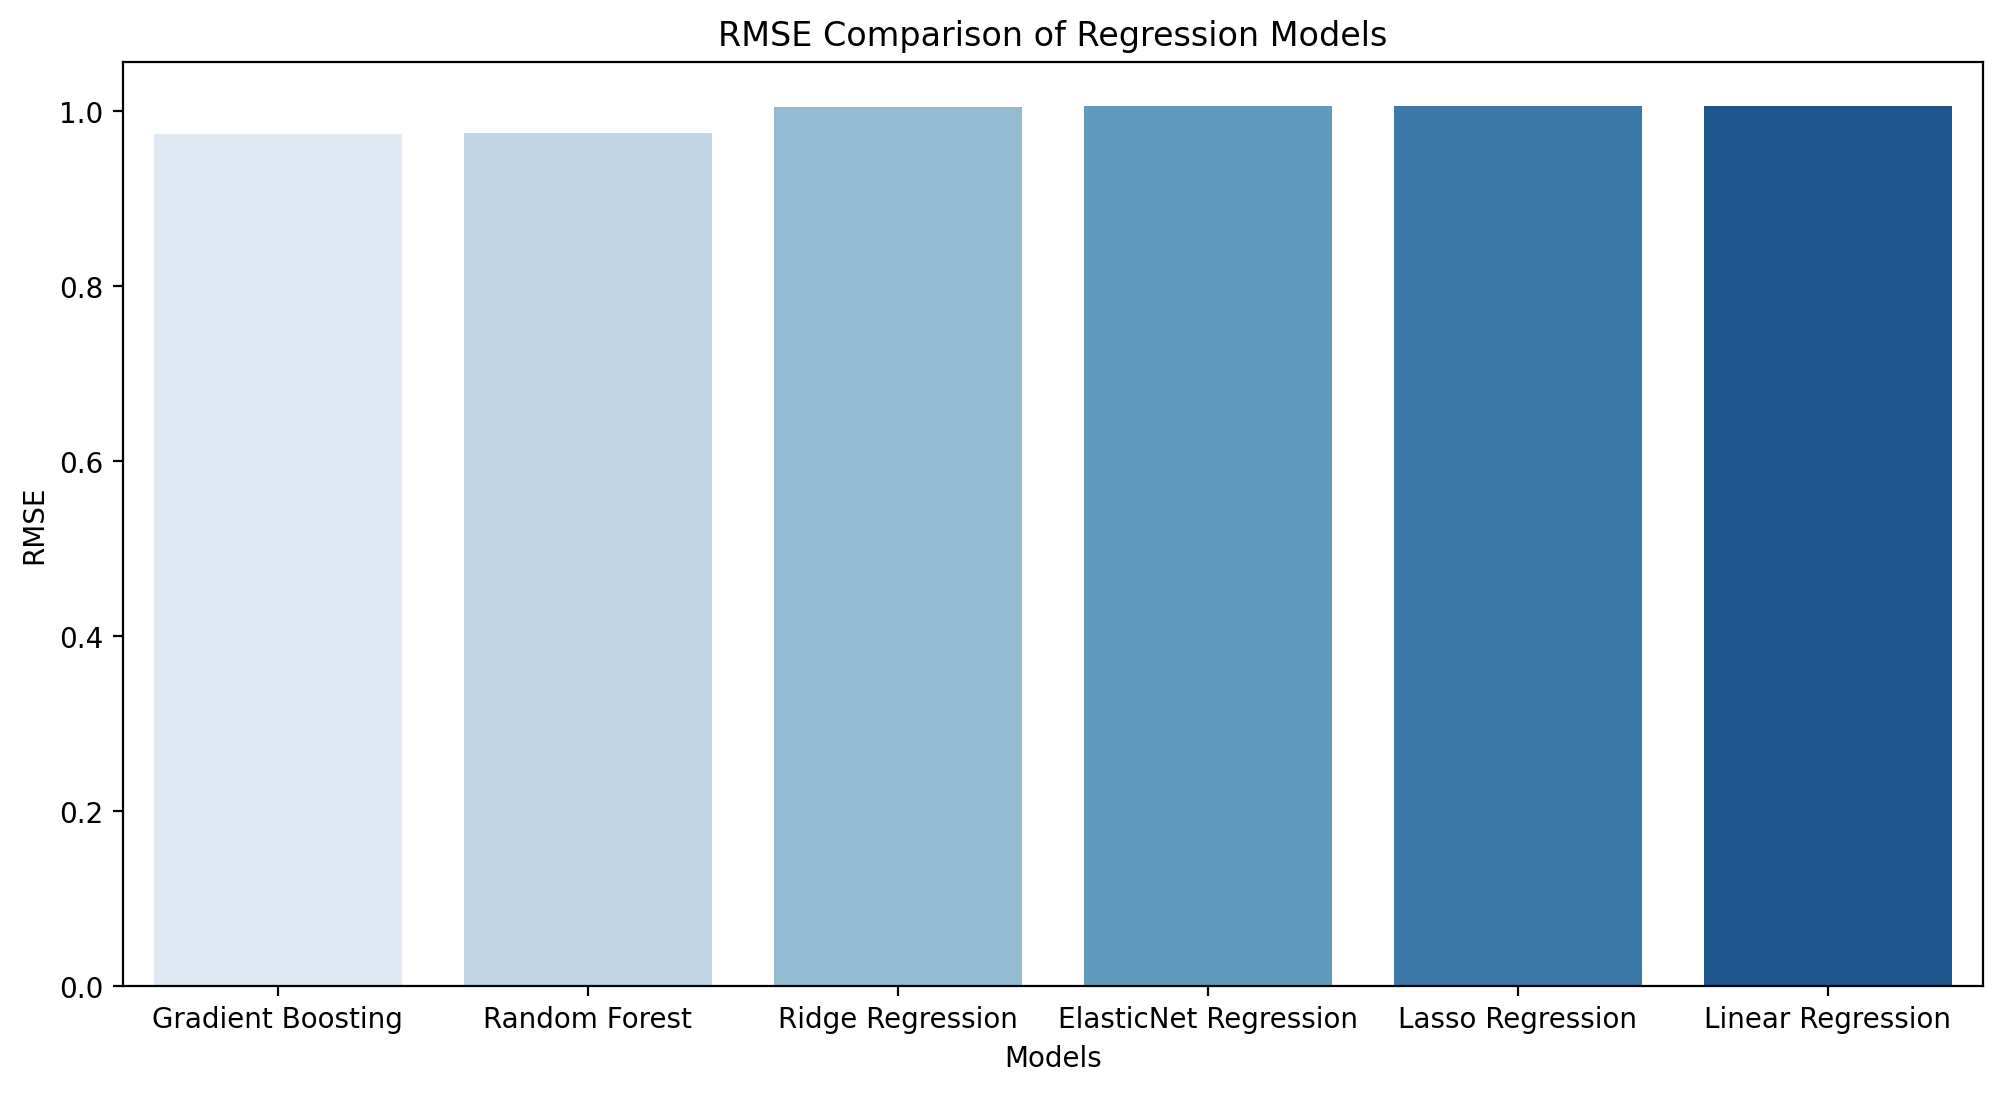

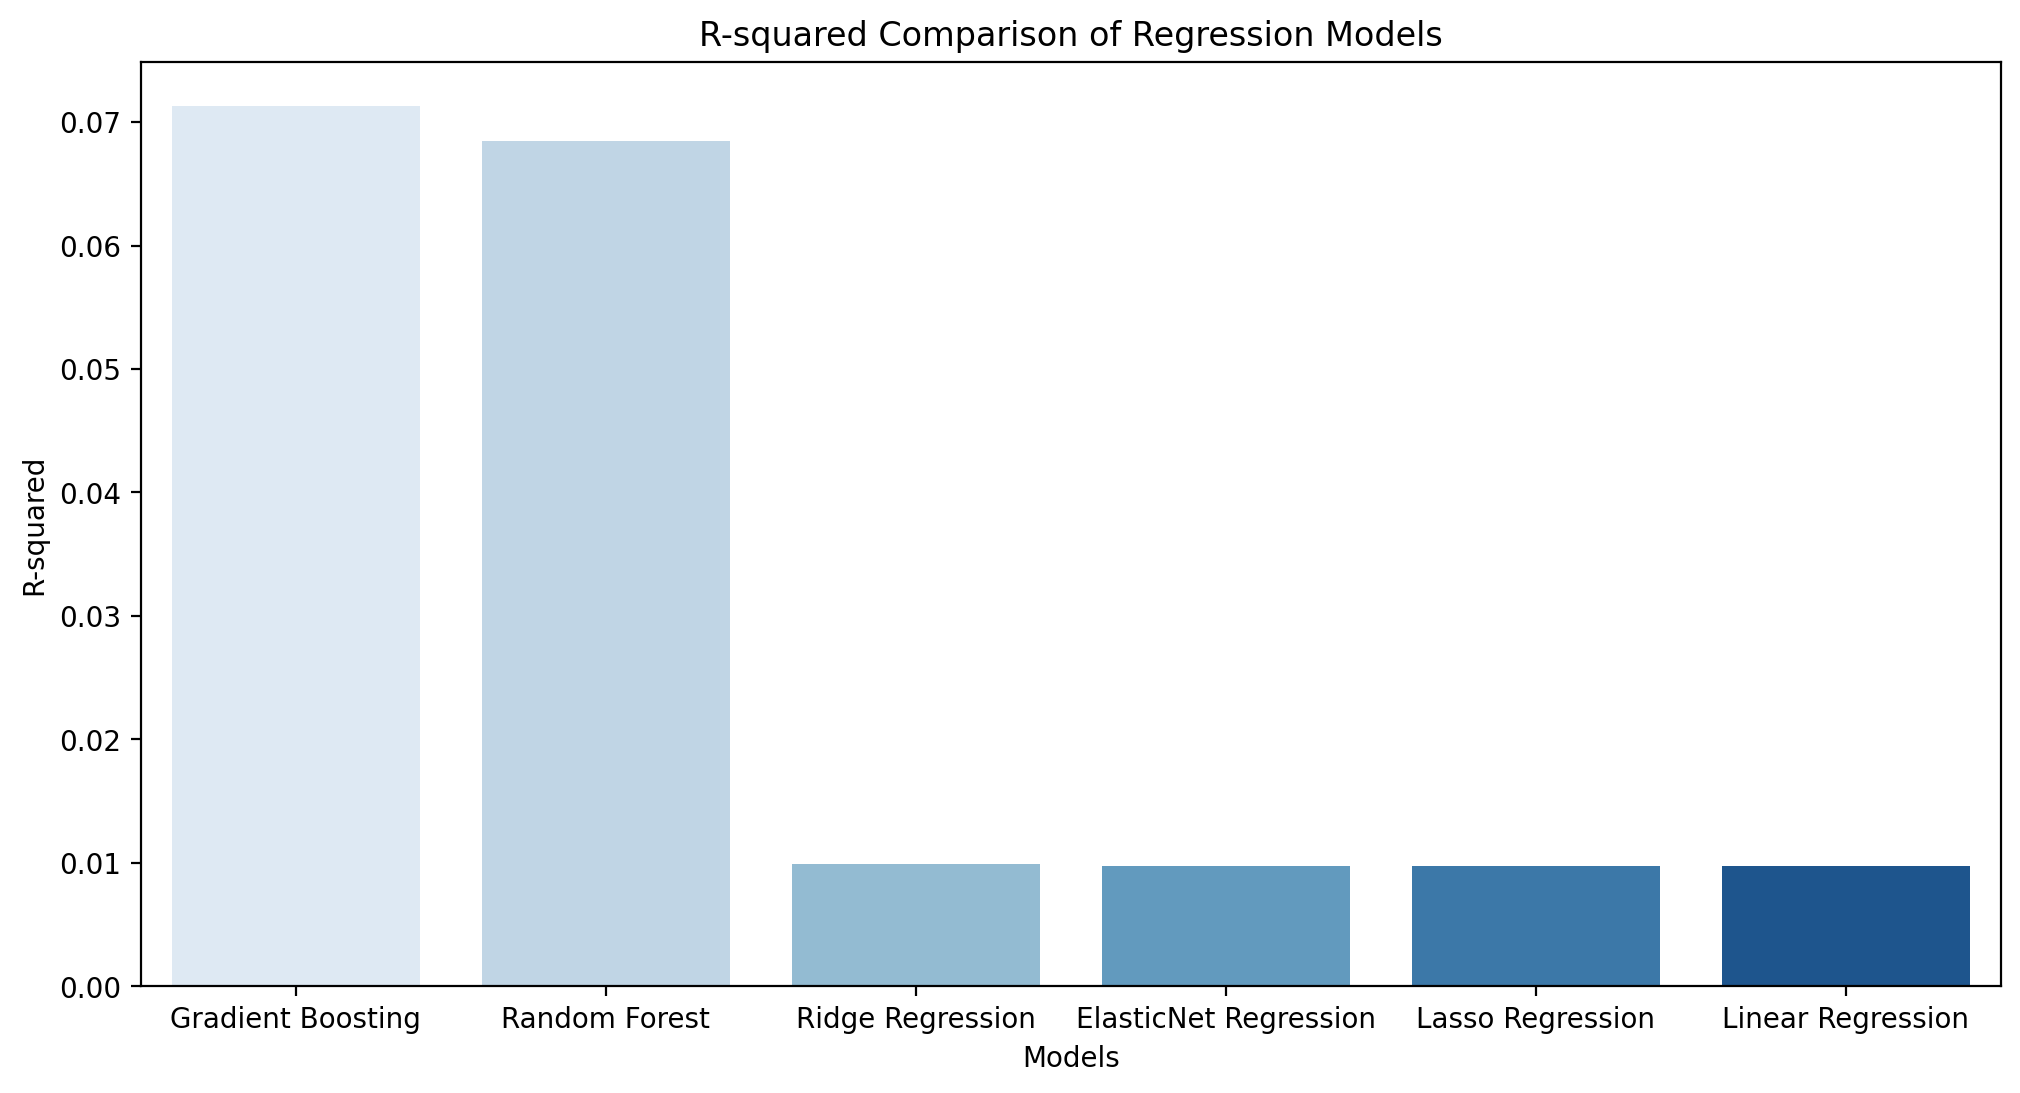

In [25]:
# Bar plot of RMSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=model_performance, palette='Blues')
plt.title('RMSE Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# Bar plot of R-squared
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R_squared', data=model_performance, palette='Blues')
plt.title('R-squared Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.show()

## 8. **Results and Insights**

In [26]:
model_performance.round(4)

,Model,RMSE,MAE,R_squared
0,Gradient Boosting,0.9740,0.7654,0.0713
1,Random Forest,0.9755,0.7711,0.0684
2,Ridge Regression,1.0056,0.7894,0.0099
3,ElasticNet Regression,1.0057,0.7898,0.0097
4,Lasso Regression,1.0057,0.7898,0.0097
5,Linear Regression,1.0057,0.7899,0.0097


#### **Model Performance Summary**:
The **Gradient Boosting model** achieved the best performance among all evaluated models with a Root Mean Squared Error (RMSE) of 0.9567, a Mean Absolute Error (MAE) of 0.7536, and an R-squared value of 0.1040, indicating a modest ability to explain the variance in the target variable.

#### **Analysis of Regression Metrics**
   * **Gradient Boosting vs. Other Models**: The Gradient Boosting model outperforms all other models with the lowest RMSE (0.9567) and MAE (0.7536). This suggests that it not only minimizes large errors more effectively but also maintains overall prediction accuracy better than its counterparts.
   * **Random Forest Performance**: Close behind Gradient Boosting, the Random Forest model exhibits a slightly higher RMSE (0.9606) and MAE (0.7572). While marginally less effective, it still significantly outperforms the linear models in reducing prediction errors.
   * **Linear Models Underperformance**: All linear models (Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression) exhibit identical RMSE (1.0112) and MAE (≈0.7680), along with negative R-squared values (≈-0.0010). This indicates that these models perform worse than a simple horizontal line, failing to capture any meaningful relationship between the embedding features and the target variable.

#### **Overall Insights**:
   * The superior performance of Gradient Boosting and Random Forest models underscores the effectiveness of ensemble methods in leveraging balanced datasets and complex feature representations. These models are adept at capturing non-linear patterns and interactions within the embedding features, leading to improved predictive accuracy.
   * Given the modest R-squared values achieved by the best-performing models, there is an evident need for further feature engineering, exploration of more sophisticated models, or additional data augmentation techniques to enhance the model’s ability to explain the variance in ratings more comprehensively.

## 9. **Conclusion**

In this notebook, we:
   * Extracted embedding features for users and courses from a neural network.
   * Trained regression models (Linear Regression, Ridge, Lasso, ElasticNet, Random Forest, Gradient Boosting) using these embeddings.
   * Evaluated and compared the performance of the models in predicting user ratings.

#### **Advantages**:
   * Regression models are straightforward to implement and interpret.
   * Faster training times compared to deep learning models.
   * Can be easily integrated into existing machine learning pipelines.

#### **Limitations**:
   * The quality of embeddings significantly impacts model performance.
   * Linear models may not capture complex patterns as effectively as ensemble methods.

## 10. **Thanks and Contact Information**

Thank you for reviewing this project notebook. For any further questions, suggestions, or collaborations, please feel free to reach out:

   * [**Email**](mailto:leejoabraham01@gmail.com)
   * [**LinkedIn**](https://www.linkedin.com/in/leejoabraham01)
   * [**GitHub**](https://github.com/LeejoAbraham01)